## Simple example predicting bicycle traffic (LinearRegression)

In [1]:

# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression


In [2]:

# reading data
data1 = pd.read_csv('./simpleData/bikeTraffic/FremontHourly.csv')
data2 = pd.read_csv('./simpleData/bikeTraffic/SeaTacWeather.csv')


In [3]:

data1.head()


,Date,Fremont Bridge NB,Fremont Bridge SB
0,10/02/2012 12:00:00 AM,0.0,0.0
1,10/02/2012 01:00:00 AM,0.0,0.0
2,10/02/2012 02:00:00 AM,0.0,0.0
3,10/02/2012 03:00:00 AM,0.0,0.0
4,10/02/2012 04:00:00 AM,0.0,0.0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14568 entries, 0 to 14567
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               14568 non-null  object 
 1   Fremont Bridge NB  14546 non-null  float64
 2   Fremont Bridge SB  14546 non-null  float64
dtypes: float64(2), object(1)
memory usage: 341.6+ KB


In [5]:

data1.set_index(pd.to_datetime(data1['Date']), inplace=True) # set Date as index
data1.drop(['Date'], axis=1, inplace=True) # delete column Date

In [6]:
data1

,Fremont Bridge NB,Fremont Bridge SB
Date,,
2012-10-02 00:00:00,0.0,0.0
2012-10-02 01:00:00,0.0,0.0
2012-10-02 02:00:00,0.0,0.0
2012-10-02 03:00:00,0.0,0.0
2012-10-02 04:00:00,0.0,0.0
...,...,...
2014-05-31 19:00:00,69.0,65.0
2014-05-31 20:00:00,43.0,61.0
2014-05-31 21:00:00,27.0,27.0


In [7]:
print('Menor data: ',data1.index.min())
print('Maior data: ',data1.index.max())

Menor data:  2012-10-02 00:00:00
Maior data:  2014-05-31 23:00:00


In [8]:
data1ResampleNB = data1['Fremont Bridge NB'].resample('D').sum()
data1ResampleSB = data1['Fremont Bridge SB'].resample('D').sum()

In [9]:
data1ResampleNB

Date
2012-10-02    1165.0
2012-10-03    1761.0
2012-10-04    1767.0
2012-10-05    1590.0
2012-10-06     926.0
               ...  
2014-05-27    2470.0
2014-05-28    1930.0
2014-05-29    2287.0
2014-05-30    2432.0
2014-05-31    1278.0
Freq: D, Name: Fremont Bridge NB, Length: 607, dtype: float64

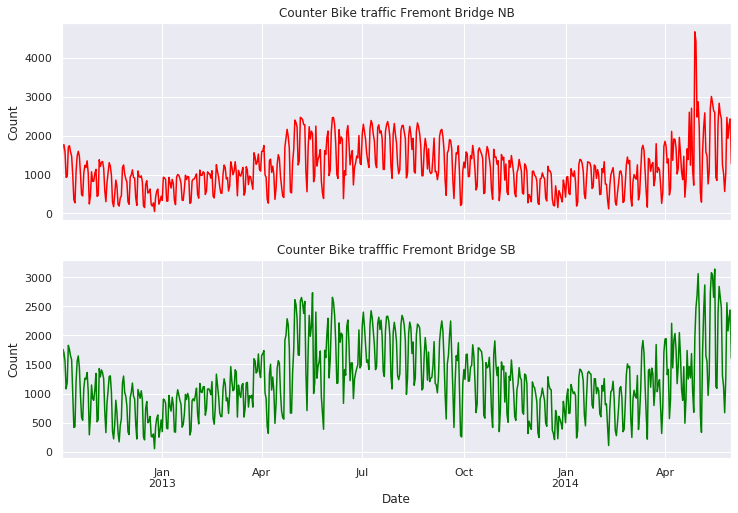

In [10]:

fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8), sharex=True)

ax1.set_title('Counter Bike traffic Fremont Bridge NB')
data1ResampleNB.plot(ax=ax1, c='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')

ax2.set_title('Counter Bike trafffic Fremont Bridge SB')
data1ResampleSB.plot(ax=ax2, c='green')
ax2.set_ylabel('Count')
plt.show()

In [11]:
data_FremontBridge = pd.DataFrame([data1ResampleNB,data1ResampleSB]).T; data_FremontBridge

,Fremont Bridge NB,Fremont Bridge SB
Date,,
2012-10-02,1165.0,773.0
2012-10-03,1761.0,1760.0
2012-10-04,1767.0,1708.0
2012-10-05,1590.0,1558.0
2012-10-06,926.0,1080.0
...,...,...
2014-05-27,2470.0,2562.0
2014-05-28,1930.0,2078.0
2014-05-29,2287.0,2300.0


In [12]:

data2.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,...,WT14,WT01,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121001,0,0,0,233,89,30,40,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121002,0,0,0,178,100,41,10,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121003,0,0,0,189,78,73,10,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121004,0,0,0,189,83,65,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121005,0,0,0,217,89,57,360,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATION       609 non-null    object
 1   STATION_NAME  609 non-null    object
 2   DATE          609 non-null    int64 
 3   PRCP          609 non-null    int64 
 4   SNWD          609 non-null    int64 
 5   SNOW          609 non-null    int64 
 6   TMAX          609 non-null    int64 
 7   TMIN          609 non-null    int64 
 8   AWND          609 non-null    int64 
 9   WDF2          609 non-null    int64 
 10  WDF5          609 non-null    int64 
 11  WSF2          609 non-null    int64 
 12  WSF5          609 non-null    int64 
 13  WT14          609 non-null    int64 
 14  WT01          609 non-null    int64 
 15  WT02          609 non-null    int64 
 16  WT22          609 non-null    int64 
 17  WT04          609 non-null    int64 
 18  WT13          609 non-null    int64 
 19  WT16    

In [14]:
print(data2['STATION_NAME'].value_counts())
print(data2['STATION_NAME'].isnull().sum())

SEATTLE TACOMA INTERNATIONAL AIRPORT WA US    609
Name: STATION_NAME, dtype: int64
0


In [15]:
# criando outro dataset baseado no data2, utilizando apenas algumas colunas

data3 = pd.DataFrame([data2['TMIN'], data2['TMAX'],data2['PRCP']]).T

In [16]:
data3.set_index(data2['DATE'], inplace=True); data3

,TMIN,TMAX,PRCP
DATE,,,
20121001,89,233,0
20121002,100,178,0
20121003,78,189,0
20121004,83,189,0
20121005,89,217,0
...,...,...,...
20140528,100,189,0
20140529,111,189,0
20140530,89,206,0


In [17]:

def editDate(x):
    s = str(x)
    n = ''
    for i, j in enumerate(s):
        n += j
        if(i == 3 or i == 5):
            n += '-'
    return n
        
data3.set_index(pd.to_datetime(data2['DATE'].apply(editDate)), inplace=True); data3

,TMIN,TMAX,PRCP
DATE,,,
2012-10-01,89,233,0
2012-10-02,100,178,0
2012-10-03,78,189,0
2012-10-04,83,189,0
2012-10-05,89,217,0
...,...,...,...
2014-05-28,100,189,0
2014-05-29,111,189,0
2014-05-30,89,206,0


In [18]:
print('Date min: ',data3.index.min())
print('Date max: ', data3.index.max())

Date min:  2012-10-01 00:00:00
Date max:  2014-06-01 00:00:00


In [19]:

data4 = pd.concat([data_FremontBridge, data3], axis=1); data4

,Fremont Bridge NB,Fremont Bridge SB,TMIN,TMAX,PRCP
2012-10-01,NaN,NaN,89,233,0
2012-10-02,1165.0,773.0,100,178,0
2012-10-03,1761.0,1760.0,78,189,0
2012-10-04,1767.0,1708.0,83,189,0
2012-10-05,1590.0,1558.0,89,217,0
...,...,...,...,...,...
2014-05-28,1930.0,2078.0,100,189,0
2014-05-29,2287.0,2300.0,111,189,0
2014-05-30,2432.0,2437.0,89,206,0
2014-05-31,1278.0,1609.0,100,233,0


In [20]:
data4.isnull().sum()

Fremont Bridge NB    2
Fremont Bridge SB    2
TMIN                 0
TMAX                 0
PRCP                 0
dtype: int64

In [21]:
data4.dropna(inplace=True); data4

,Fremont Bridge NB,Fremont Bridge SB,TMIN,TMAX,PRCP
2012-10-02,1165.0,773.0,100,178,0
2012-10-03,1761.0,1760.0,78,189,0
2012-10-04,1767.0,1708.0,83,189,0
2012-10-05,1590.0,1558.0,89,217,0
2012-10-06,926.0,1080.0,78,239,0
...,...,...,...,...,...
2014-05-27,2470.0,2562.0,100,200,0
2014-05-28,1930.0,2078.0,100,189,0
2014-05-29,2287.0,2300.0,111,189,0
2014-05-30,2432.0,2437.0,89,206,0


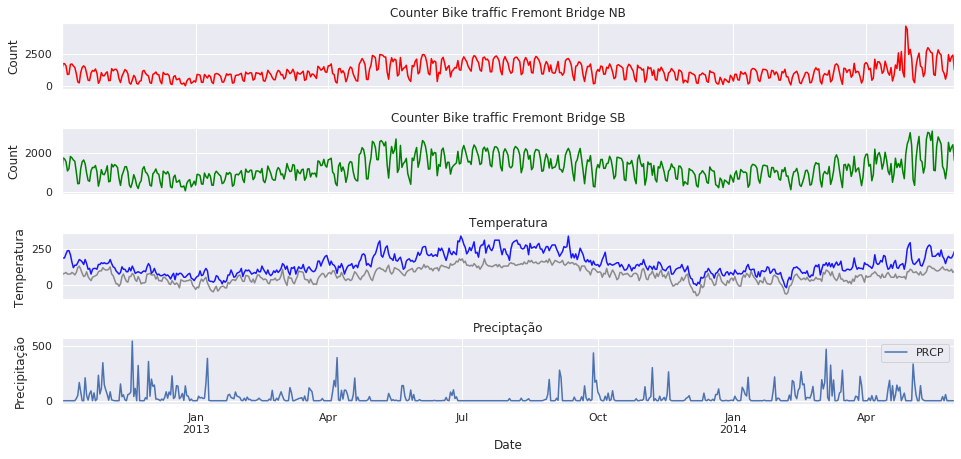

In [32]:

fig, (ax1,ax2, ax3, ax4) = plt.subplots(4, figsize=(16,7), sharex=True)
fig.subplots_adjust(hspace=0.6)

data4['Fremont Bridge NB'].plot(ax=ax1, c='red')
ax1.set_title('Counter Bike traffic Fremont Bridge NB')
ax1.set_ylabel('Count')

data4['Fremont Bridge SB'].plot(ax=ax2, c='green')
ax2.set_title('Counter Bike traffic Fremont Bridge SB')
ax2.set_ylabel('Count')

data4['TMIN'].plot(ax=ax3, alpha=0.9, c='gray')
data4['TMAX'].plot(ax=ax3, alpha=0.9, c='blue')
ax3.set_title('Temperatura')
ax3.set_ylabel('Temperatura ')



data4['PRCP'].plot(ax=ax4)
ax4.set_ylabel('Precipitação')
ax4.set_title('Preciptação')
ax4.set_xlabel('Date')


plt.legend()
plt.show()


É de grande importância conhecer as unitdades das colunas de temperatura e preciptação, para esse caso não conseguiu-se encontrar essas unidades.

## Reference

[1]https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
<br>
[2]https://github.com/jakevdp/SeattleBike
<br>